In [133]:
import logging
from sys import stdout
from datetime import datetime

logging.basicConfig(
    level=logging.INFO,
    format="[%(asctime)s][%(levelname)s] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np

from typing import Callable

def eliminacion_gaussiana(A: np.ndarray) -> np.ndarray:

    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A)
    assert A.shape[0] == A.shape[1] - 1, "La matriz A debe ser de tamaño n-by-(n+1)."
    n = A.shape[0]

    for i in range(0, n - 1):  # loop por columna

        # --- encontrar pivote
        p = None  # default, first element
        for pi in range(i, n):
            if A[pi, i] == 0:
                # must be nonzero
                continue

            if p is None:
                # first nonzero element
                p = pi
                continue

            if abs(A[pi, i]) < abs(A[p, i]):
                p = pi

        if p is None:
            # no pivot found.
            raise ValueError("No existe solución única.")

        if p != i:
            # swap rows
            logging.debug(f"Intercambiando filas {i} y {p}")
            _aux = A[i, :].copy()
            A[i, :] = A[p, :].copy()
            A[p, :] = _aux

        # --- Eliminación: loop por fila
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] = A[j, i:] - m * A[i, i:]

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        raise ValueError("No existe solución única.")

        print(f"\n{A}")
    # --- Sustitución hacia atrás
    solucion = np.zeros(n)
    solucion[n - 1] = A[n - 1, n] / A[n - 1, n - 1]

    for i in range(n - 2, -1, -1):
        suma = 0
        for j in range(i + 1, n):
            suma += A[i, j] * solucion[j]
        solucion[i] = (A[i, n] - suma) / A[i, i]

    return solucion




[01-08 13:07:37][INFO] 2026-01-08 13:07:37.741684


In [134]:
def der_parcial_3(xs: list, ys: list) -> list:
    arr_x = np.array(xs)
    arr_y = np.array(ys)
    n = len(arr_x)
    xi = np.sum(arr_x)
    xi2 = np.sum(arr_x ** 2)
    yi = np.sum(arr_y)
    return [xi2, xi, n, yi]

def der_parcial_2(xs: list, ys: list) -> list:
    arr_x = np.array(xs)
    arr_y = np.array(ys)
    xi = np.sum(arr_x)
    xi2 = np.sum(arr_x ** 2)
    xi3 = np.sum(arr_x ** 3)
    xi_yi = np.sum(arr_x * arr_y)
    return [xi3, xi2, xi, xi_yi]

def der_parcial_1(xs: list, ys: list) -> list:
    arr_x = np.array(xs)
    arr_y = np.array(ys)
    xi2 = np.sum(arr_x ** 2)
    xi3 = np.sum(arr_x ** 3)
    xi4 = np.sum(arr_x ** 4)
    xi2_yi = np.sum((arr_x ** 2) * arr_y)
    return [xi4, xi3, xi2, xi2_yi]

In [135]:
def ajustar_min_cuadrados(
    xs: list,
    ys: list,
    gradiente: list[Callable[[list[float], list[float]], tuple]],
) -> list[float]:

    assert len(xs) == len(ys), "xs y ys deben tener la misma longitud."

    n = len(xs)

    num_pars = len(gradiente)
    logging.info(f"Se ajustarán {num_pars} parámetros.")
    # --- construir matriz A y vector b
    Ab = np.zeros((num_pars, num_pars + 1), dtype=float)

    for i, der_parcial in enumerate(gradiente):
        assert callable(der_parcial), "Cada derivada parcial debe ser una función."

        Ab[i, :] = der_parcial(xs, ys)

    return list(eliminacion_gaussiana(Ab))

In [136]:
xs = [
    -5.0000,
    -3.8889,
    -2.7778,
    -1.6667,
    -0.5556,
    0.5556,
    1.6667,
    2.7778,
    3.8889,
    5.0000,
]
ys = [
    57.2441,
    33.0303,
    16.4817,
    7.0299,
    0.5498,
    0.7117,
    3.4185,
    12.1767,
    24.9167,
    44.2495,
]

ajustar_min_cuadrados(xs, ys, [der_parcial_1, der_parcial_2, der_parcial_3])





[01-08 13:07:37][INFO] Se ajustarán 3 parámetros.
[01-08 13:07:37][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[01-08 13:07:37][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]


[np.float64(2.024410482925083),
 np.float64(-1.1233251295755433),
 np.float64(-0.6382556172537739)]

[01-08 13:07:37][INFO] Se ajustarán 3 parámetros.
[01-08 13:07:37][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
[01-08 13:07:37][INFO] 
[[ 1.01852593e+02  0.00000000e+00  1.00000000e+01  1.99808900e+02]
 [ 0.00000000e+00  1.01852593e+02  0.00000000e+00 -1.14413577e+02]
 [-2.27373675e-13  0.00000000e+00 -7.90113041e+01  5.04294087e+01]]
Coeficientes del polinomio ajustado: a2=2.024410482925083, a1=-1.1233251295755433, a0=-0.6382556172537739


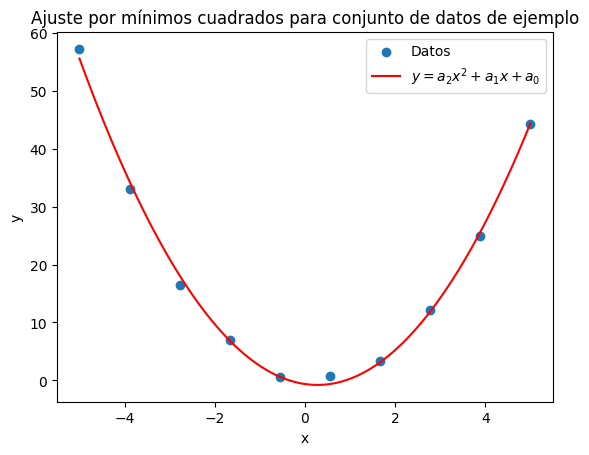

In [137]:
'''#Grafica de los datos
import matplotlib.pyplot as plt
plt.scatter(xs, ys, color='blue', label='Datos')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos de ejemplo')
plt.show()
'''
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 100)

a2, a1, a0 = ajustar_min_cuadrados(xs, ys, gradiente=[der_parcial_1, der_parcial_2, der_parcial_3])
y= a2 * x**2 + a1 * x + a0
print(f"Coeficientes del polinomio ajustado: a2={a2}, a1={a1}, a0={a0}")

plt.scatter(xs, ys, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_2 x^2 + a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para conjunto de datos de ejemplo")
plt.legend()
plt.show()


In [138]:
x=2.25
y= a2 * x**2 + a1 * x + a0
print(y)

7.082840911009486


In [139]:
x=-2.25
y= a2 * x**2 + a1 * x + a0
print(y)

12.13780399409943


## EJERCICIO 2

In [140]:
xs2 = [
    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]
ys2 = [
    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]

In [ ]:
def der_parcial_2(xs2: list, ys2: list) -> list:
    arr_x = np.array(xs2)
    arr_y = np.array(ys2)
    x_i = np.sum(arr_x)
    n = len(arr_x)
    # usar log natural de y para ajuste exponencial (log-transform)
    Y = np.log(arr_y)
    y_i = np.sum(Y)
    return [x_i, n, y_i]

# Mayor: derivadas parciales para ajuste lineal sobre log(y)
def der_parcial_1(xs2: list, ys2: list) -> list:
    arr_x = np.array(xs2)
    arr_y = np.array(ys2)

    xi2 = np.sum(arr_x ** 2)
    xi = np.sum(arr_x)
    # usar log natural de y para ajuste exponencial (log-transform)
    Y = np.log(arr_y)
    yi_xi = np.sum(arr_x * Y)
    return [xi2, xi, yi_xi]

In [ ]:
ajustar_min_cuadrados(xs2, ys2, gradiente=[der_parcial_1, der_parcial_2])

[01-08 13:07:37][INFO] Se ajustarán 2 parámetros.


AttributeError: module 'numpy' has no attribute 'ln'

In [ ]:
#Grafica de los datos xs2, ys2
import matplotlib.pyplot as plt
x = np.linspace(0, 3, 100)
a1, a0 = ajustar_min_cuadrados(xs2, ys2, [der_parcial_1, der_parcial_2])
y= a1 * x + a0
plt.scatter(xs2, ys2, label="Datos")
plt.plot(x, y, color="red", label=r"$ y = a_1 x + a_0 $")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste por mínimos cuadrados para segundo conjunto de datos")
plt.legend()
plt.show()

[01-08 13:06:39][INFO] Se ajustarán 2 parámetros.


AttributeError: module 'numpy' has no attribute 'ln'